# Multiple Regression

Shows how to calculate just the best fit, or - using "statsmodels" - all the
corresponding statistical parameters.

Also shows how to make 3d plots.

Author: Thomas Haslwanter, Date:   June-2014

In [1]:
# The standard imports
%pylab inline
import pandas as pd
# For the 3d plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# For the statistic
from statsmodels.formula.api import ols

Populating the interactive namespace from numpy and matplotlib


## Generate and show the data

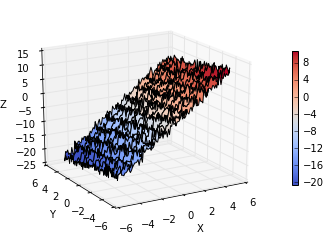

In [2]:
x = np.linspace(-5,5,101)
(X,Y) = np.meshgrid(x,x)
Z = -5 + 3*X-0.5*Y+np.random.randn(np.shape(X)[0], np.shape(X)[1])

# Plot the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,Z, cmap=cm.coolwarm)
ax.view_init(20,-120)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(surf, shrink=0.6)

## Simple plane fit

In [3]:
M = np.vstack((np.ones(len(X)), X, Y)).T
bestfit = np.linalg.lstsq(M,Z)[0]
print('Best fit plane:', bestfit)

Best fit plane: [[ -3.68183005e+11   9.73243362e+11  -1.13814731e+12 ...,  -6.00391205e+10
   -1.08203029e+12   1.46569096e+12]
 [ -9.47991633e+12   8.22360082e+11   3.70751445e+11 ...,  -2.65304402e+12
    3.33542268e+12  -2.15341208e+12]
 [  2.65414996e+12   4.63032751e+11   3.89730614e+12 ...,  -6.25955539e+12
    2.74145362e+11  -1.73344009e+12]
 ..., 
 [ -9.98910345e+11   3.23600180e+12  -3.52406256e+11 ...,  -2.28510003e+12
   -3.36365096e+12  -1.44071474e+12]
 [ -1.26588999e+12  -4.72002641e+11   6.15422898e+11 ...,  -3.82783222e+11
   -3.34211406e+12   2.84297917e+12]
 [ -2.01216115e+11   1.24471110e+12  -4.77144576e+11 ...,  -3.25870227e+10
    1.63610980e+12  -2.26078079e+12]]


## Multilinear regression model

In [4]:
# calculate fit, P-values, confidence intervals etc.
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()
# Convert the data into a Pandas DataFrame
df = pd.DataFrame({'x':X, 'y':Y, 'z':Z})

# Fit the model
model = ols("z ~ x + y", df).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 4.033e+05
Date:                Sat, 30 Jul 2016   Prob (F-statistic):               0.00
Time:                        13:13:23   Log-Likelihood:                -14448.
No. Observations:               10201   AIC:                         2.890e+04
Df Residuals:                   10198   BIC:                         2.892e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.0166      0.010   -507.939      0.0